# Homework 2 - Answer Sheet

__Name__: Dong Wang

__UID__: 804363328

## Problem 1 Multinomial Mixture Model

Please write down your answer in the cell below.

Let $X_1,X_2,...,X_n$ be per-document word count vectoirs, where n is the total number of documents. In particular, $X_{iv}=m$, if word $v$ appears $m$ times in document $i$. To simplify notation, we will assume that each document contains the same number of words in total:$\sum_v X_{iv}=M$.Assume we have $p$ possible words in total. where $v \subset [1,2,3,4,....p]$ 

For each document,the conditional probability density function is $f(x_j|\beta_j) =\frac{M!}{x_1!\cdots x_p!} \prod \limits_{v=1}^p \beta_{jv}^{x_v}$, where$\beta_{jv}$ is the unknown probability of selecting word $v$  for category $j$.
Like GMM, we have the joint probability of a docement $i$ and its category $j$: $p(x_i,z_i=C_j)=w_jf_j(x_i),\rightarrow p(x_i)=\sum_j w_jf_j(x_i)$

The we will have $L(D|\theta)=\prod \limits_i \sum \limits_j w_j f(x_i|\beta_j) s.t. \sum_j w_j=1\  \&  \ w_j>=0$, then the log likelihood will be:
$log L(D|\theta)=\sum \limits_i log \sum\limits_j w_jf(x_i|\beta_j)$ where $\theta={w_j, \beta_j}$

E-Step: $w_{ij}^{t+1}=p(Z_i=j|x_i,\theta_{j}^{t}) \propto w_j^{t}*p(x_i|\theta_{j}^{t})\Rightarrow w_{ij}^{t+1}=\frac{w_j^{t}*p(x_i|\theta_{j}^{t})}{\sum_k w_k^{t}*p(x_i|\theta_{k}^{t}) }$

M-Step: $\theta ^{t+1}=argmax\sum_i \sum_j w_{ij}^{t+1} log p(x_i,Z_i=j|\theta) =argmax\sum_i \sum_j w_{ij}^{t+1} log [p(x_i|\beta_j)\times w_j]$

let $J_1=\sum_i \sum_j w_{ij} log w_j s.t. 0<= w_j<=1 \& \sum w_j=1$, then we can use lagrange multiplier  to get: $J_1=\sum_i \sum_j w_{ij} log w_j+\lambda(\sum w_j -1)$
$$\frac{\partial J_1 }{\partial w_j }= \frac{\sum_i  w_{ij}}{w_j}+\lambda=0\\
\Rightarrow \sum_i w_{ij}+\lambda*w_j=0\\
\sum_i\sum_j w_{ij}+\lambda*\sum_j w_j=0\\
\Rightarrow \lambda=-\sum_i\sum_j w_{ij}=\sum_i*1=n\\
\Rightarrow w_j=\frac{1}{n}\sum \limits_{i=1}^n w_{ij}
$$ 
let $J_2=\sum_i \sum_j w_{ij} log [\frac{M!}{x_1!\cdots x_p!} \prod \limits_{v=1}^p \beta_{jv}^{x_{iv}}]=\sum \limits_{i=1}^n \sum \limits_{j=1}^k \sum \limits_{v=1}^p x_{iv}w_{ij}log\beta_{jv}+constant, s.t. \sum \limits_{v=1}^{p} \beta_{jv}=1$, then we can have $J_2=\sum \limits_{i=1}^n \sum \limits_{j=1}^k \sum \limits_{v=1}^p x_{iv}w_{ij}log\beta_{jv}+constant+\lambda(\sum \limits_{v=1}^{p} \beta_{jv}-1)$
$$\frac{\partial J_2 }{\partial \beta_{jv}}=\frac{1}{\beta_{jv}} \sum \limits_{i=1}^n x_{iv}w_{ij}+\lambda=0\\
\Rightarrow \sum \limits_{i=1}^n x_{iv}w_{ij}+\lambda* \beta_{jv} =0 \\
\sum \limits_{i=1}^n \sum \limits_{v=1}^p x_{iv}w_{ij}+\lambda* \sum \limits_{v=1}^{p} \beta{jv} =0\\
\Rightarrow \lambda =- \sum \limits_{i=1}^n \sum \limits_{v=1}^p x_{iv}w_{ij}\\
\beta_{jv}=-\frac{\sum \limits_{i=1}^n x_{iv}w_{ij}}{\lambda}=\frac{\sum \limits_{i=1}^n x_{iv}w_{ij}}{\sum \limits_{i=1}^n \sum \limits_{v=1}^p x_{iv}w_{ij}}=\frac{\sum \limits_{i=1}^n x_{iv}w_{ij}}{M\sum \limits_{i=1}^n w_{ij}}$$

## Problem 2: Semi-supervised learning

### (1) Model & learning algorithm

Initialization: Initialize the $\beta_{jv}$ and $w_j$ with random variables and satisty the requirement$\sum \limits_{v=1}^{p} \beta_{jv}=1$ and $\sum_j w_j=1$, where $0<\beta_{jv}<1$ and $0<w_j<1$ for unlabeled documents.

E-step: Just use the unlabeled documents to calculate the posterior.
$w_{ij}^{t+1}=p(y_i=c_j|x_i,\theta_{j}^{t}) \propto w_j^{t}*p(x_i|\theta_{j}^{t})$$\Rightarrow w_{ij}^{t+1}=\frac{w_j^{t}*p(x_i|\theta_{j}^{t})}{\sum_k w_k^{t}*p(x_i|\theta_{k}^{t}) }=\frac{w_j^{t}*\frac{M!}{x_1!\cdots x_p!} \prod \limits_{v=1}^p \beta_{jv}^{x_v}}{\sum_k w_k^{t}*\frac{M!}{x_1!\cdots x_p!} \prod \limits_{v=1}^p \beta_{kv}^{x_v} } =\frac{w_j^{t}*\prod \limits_{v=1}^p \beta_{jv}^{x_v}}{\sum_k w_k^{t}* \prod \limits_{v=1}^p \beta_{kv}^{x_v}}$

M-step: Re-estimate the classifier, $\hat \theta$, which is $w_j$ and $\beta_{jv}^{x_v}$ here. The log likelihood fuction will be:
$$l(\theta|X,Y)=log(P(\theta)+\sum\limits_{x_i \subset X_u} log \sum \limits_j P(c_j|\theta)P(x_i|c_j;\theta)+\sum_{x_i \subset X_l}log(P(y_i=c_j|\theta)P(x_i|y_i=c_j;\theta))$$
$$l(\theta|X,Y)\propto \sum\limits_{x_i \subset X_u} \sum \limits_j P(c_j|\theta) log P(x_i|c_j;\theta)+\sum_{x_i \subset X_l}log(P(y_i=c_j|\theta)P(x_i|y_i=c_j;\theta)) = argmax\{\sum\limits_{x_i \subset X_u} \sum_j w_{ij}^{t+1} log [p(x_i|\beta_j)\times w_j]+\sum_{x_i \subset X_l}log[p(x_i|\beta_{\hat j})\times w_{\hat j}]\}$$

Then we can use lagrange multiplier  to get: $$w_j=\frac{1}{n+n'}[\sum \limits_{i=1}^n w_{ij}+\sum \limits_{i=1}^{n'}1(y_i'==c_j)]$$
$$\beta_{jv}=\frac{\sum \limits_{i=1}^n x_{iv}w_{ij}+\sum \limits_{i'=1}^{n'}x_{i'v}1(y_{i'}==c_j)}{\sum \limits_{i=1}^n \sum \limits_{v=1}^p x_{iv}w_{ij}+\sum \limits_{i'=1}^{n'} \sum \limits_{v=1}^p x_{i'v}1(y_{i'}==c_j)}
$$

### (2) Implementation


Please find the dataset called `p2_dataset.zip`. It is a dataset about people's reviews for books from Amazon.com. The dataset is processed and organized in the following format:
```
<word1>:<count_of_word1> <word2>:<count_of_word2> ... #label#:<label>
```
Each line contains the frequency of a word appearing in each piece of review text.
The `#label#`, a number from 1.0 to 5.0, shows the sentiment expressed by the review. We use the label as the target to predict. (*Interestingly, the sentiments set do not contain 3.0*)

Here are some suggestions of further massage the dataset before feeding it into your model.

- stemming: reduces the morpholical variants of a word. E.g., convert "programming", "programs", "programmed" all to "program". 
- word segmentation: some of the words are a concatenation of two words.
- tokenize: convert actual words to numbers.
You can find all of the resources from a Python package called `nltk` (Natural Language TookKit).

In [357]:
import sys
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [325]:
#Read the labeled data
with open('p2.labeled','rb') as f:
    content1 = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content1 = [x.strip() for x in content1] 
vocabulary=[]
# store the review star for the labeled data
y_labeled=np.zeros(len(content1))
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
def preprocess(word,stopwords):
    #remove the words that are stop words or include non character part
    if word in stopwords or not word.isalpha():
            return
    else:
        word = ps.stem(word)
        return word  

for i in range(len(content1)):
    # read each review
    x=content1[i].decode("utf-8").split()
    y_labeled[i]=int(x[-1][-3])
    for j in range(len(x)-1):
        # get each word and corresponding count number 
        word = x[j].split(':')[0]
        word=word.split('_')
        # split those which are a concatenation of multiple words 
        for k in range(len(word)):
            one_word=word[k]
            word_filtered= preprocess(one_word,stop_words)
            if word_filtered is None or word_filtered in vocabulary:
                pass
            else:
                vocabulary.append(word_filtered)

In [326]:
#Read the unlabeled data
with open('p2.unlabeled','rb') as f:
    content2 = f.readlines()
# you may also want to remove whitespace characters like `|n` at the end of each line
content2 = [x.strip() for x in content2] 
y_unlabeled=np.zeros(len(content2))

for i in range(len(content2)):
    # read each review
    x=content2[i].decode("utf-8").split()
    for j in range(len(x)):
        # get each word and corresponding count number 
        word = x[j].split(':')[0]
        word=word.split('_')
        # split those which are a concatenation of multiple words 
        for k in range(len(word)):
            one_word=word[k]
            word_filtered= preprocess(one_word,stop_words)
            if word_filtered is None or word_filtered in vocabulary:
                pass
            else:
                vocabulary.append(word_filtered)
print("The length of vocabulary:%d"% len(vocabulary))

The length of vocabulary:10155


In [327]:
#Put the corresponding count number for each vocabulary word as an array 
data=np.zeros([len(content1)+len(content2),len( vocabulary)])
#Each row is the vector to present the count of each word for that review.The first 550 are labeled review.the extra are unlabeled review
print("The shape of data:%s"% (data.shape,))
filenames=['p2.labeled','p2.unlabeled']
for fname in filenames:
    with open(fname,'rb') as file:
        content = file.readlines()
    content = [x.strip() for x in content]
    if fname=='p2.labeled':
        current=0
    else:
        current=550
    for i in range(len(content)):
    # read each review
        x=content[i].decode("utf-8").split()
        if fname=='p2.labeled':
            len_x=len(x)-1
        else:
            len_x=len(x)
        for j in range(len_x):
            # get each word and corresponding count number 
            word = x[j].split(':')[0]
            count= int(x[j].split(':')[1])
            word=word.split('_')
            # split those which are a concatenation of multiple words 
            for k in range(len(word)):
                one_word=word[k]
                word_filtered= preprocess(one_word,stop_words)
                if word_filtered is None or word_filtered not in vocabulary:
                    pass
                else:
                    data[current+i,vocabulary.index(word_filtered)]+=count
np.savetxt('data.csv', data, delimiter = ',' )       

The shape of data:(1101, 10155)


In [328]:
#remove the words that appear less than 10 times in all reviews
index=np.where(np.sum(data,axis=0)>=10)[0]
new_vocabulary=[]
for i in range(index.shape[0]):
    new_vocabulary.append(vocabulary[index[i]])
print("The length of new vocabulary:%d"% len(new_vocabulary))
# Recompute the bag of words for each review based on the new vocabulary   
new_data=np.zeros([len(content1)+len(content2),len( new_vocabulary)])
#Each row is the vector to present the count of each word for that review.The first 550 are labeled review.the extra are unlabeled review
print("The shape of new data:%s"% (new_data.shape,))
filenames=['p2.labeled','p2.unlabeled']
for fname in filenames:
    with open(fname,'rb') as file:
        content = file.readlines()
    content = [x.strip() for x in content]
    if fname=='p2.labeled':
        current=0
    else:
        current=550
    for i in range(len(content)):
    # read each review
        x=content[i].decode("utf-8").split()
        if fname=='p2.labeled':
            len_x=len(x)-1
        else:
            len_x=len(x)
        for j in range(len_x):
            # get each word and corresponding count number 
            word = x[j].split(':')[0]
            count= int(x[j].split(':')[1])
            word=word.split('_')
            # split those which are a concatenation of multiple words 
            for k in range(len(word)):
                one_word=word[k]
                word_filtered= preprocess(one_word,stop_words)
                if word_filtered is None or word_filtered not in new_vocabulary:
                    pass
                else:
                    new_data[current+i,new_vocabulary.index(word_filtered)]+=count
#np.savetxt('new_data.csv', data, delimiter = ',' )    

The length of new vocabulary:3203
The shape of new data:(1101, 3203)


## Supervised learning with naive bayes

In [329]:
X_labeled=new_data[0:550,:]
X_labeled_train, X_labeled_test, y_labeled_train, y_labeled_test = train_test_split(X_labeled, y_labeled,test_size=0.2)
nb_clf = MultinomialNB()
nb_clf.fit(X_labeled_train, y_labeled_train)
y_pred_labeled = nb_clf.predict(X_labeled_test)
print(classification_report(y_labeled_test, y_pred_labeled))

             precision    recall  f1-score   support

        1.0       0.44      0.32      0.37        25
        2.0       0.32      0.50      0.39        26
        4.0       0.32      0.23      0.27        30
        5.0       0.41      0.41      0.41        29

avg / total       0.37      0.36      0.36       110



## EM with both labeled and unlabeled data

In [365]:
# Intialization
beta=np.random.dirichlet(np.ones(len(new_vocabulary)),size=4)
w_j=np.random.dirichlet(np.ones(4),size=1)
star_type=np.unique(y_labeled)

In [366]:
w_labeled=np.zeros([440,4])
for i in range(440):
    w_labeled[i,(np.where(star_type==y_labeled_train[i]))[0]]=1
w_unlabeled=np.zeros([551,4])

for m in range(5000):
    # E-step 
    w_unlabeled_new=np.zeros([551,4])
    for i in range(551):
        W_unlabeled=np.log(w_j)+np.dot(new_data[550+i,:],np.log(beta.transpose()))
        W_unlabeled-=np.max(W_unlabeled)
        w_unlabeled[i,:]=np.exp(W_unlabeled)/np.sum(np.exp(W_unlabeled),axis=1,keepdims=True)
        w_unlabeled_new[i,np.argmax(w_unlabeled[i,:])]=1
            
    #M-step
    w_j=1/991*(np.sum(w_unlabeled_new,axis=0,keepdims=True)+np.sum(w_labeled,axis=0,keepdims=True))
    #print(w_j)
    Beta=np.dot(w_unlabeled_new.transpose(),new_data[550:,:])+  np.dot(w_labeled.transpose(), X_labeled_train)
    beta=Beta/np.sum(Beta,axis=1,keepdims=True)
    beta+=1.0e-100
    

In [367]:
# Testing Result
print("The number of testing data:%s"% len(y_labeled_test))
w_test=np.zeros([110,4])
y_pred=np.zeros([110,1])
for i in range(110):
    W_test=np.log(w_j)+np.dot(new_data[550+i,:],np.log(beta.transpose()))
    W_test-=np.max(W_test)
    w_test[i,:]=np.exp(W_test)/np.sum(np.exp(W_test),axis=1,keepdims=True)
for i in range(110) :   
    y_pred[i]= star_type[np.argmax(w_test[i,:])]
print(classification_report(y_labeled_test, y_pred))

The number of testing data:110
             precision    recall  f1-score   support

        1.0       0.21      0.24      0.22        25
        2.0       0.26      0.27      0.26        26
        4.0       0.37      0.47      0.41        30
        5.0       0.38      0.21      0.27        29

avg / total       0.31      0.30      0.30       110



## Problem 3 Poisson Regressions

Add your answers in the cell below.

### (1)
No. We assume the the parameters are $w_1,w_2,\beta$ for example. So the predictor $X^T \beta$ are $-w_1+2*w_2+w_0$ for point $x^{(1)}$; $2*w_2+w_0$ for point $x^{(2)}$ and $w_1+2*w_2+w_0$ for point $x^{(3)}$. If $w_1\neq0$,as ${(X^T \beta)}_2$ is between ${(X^T \beta)}_1$ and ${(X^T \beta)}_3$ ,$y^{(2)}$ has to be 1 given that $y^{(1)}=1$and $y^{(3)}=1$. If $w_1=0$, then ${(X^T \beta)}_1={(X^T \beta)}_2={(X^T \beta)}_3$ which means that $y^{(1)}=y^{(2)}=y^{(3)}$. It proves that the given case can't be separated by logistic regression


### (2)
Yes.The first step is to make point $x^{(2)}$ above or below the line connected by $x_{(1)}$ and $x_{(3)}$ . For example, the hidden layer we can have weight$w_{11}=0.4,w_{12}=0.1,w_{21}=0.1,w_{22}=0.1,b_1=b_2=0$, then after sigmoid activation, the hidden layer will be $h^{(1)}=(0.45017,0.52498),h^{(2)}=(0.54983,0.54983),h^{(3)}=(0.64566,0.57444)$. Then the weights for the output layer is $w_{1}=-0.25,w_{2}=1.0,b=-0.41240$,after the activation function, the output is $y_1=0.5001,y_2=0.4999,y_3=0.5002$. So the original point$x^{(2)}$ will be classified as $0$ while $x^{(1)}$ and $x^{(3)}$ will be classified as 1.

### (3) Implementation

Hint:

- `pandas` provide a function `read_csv` that can convert `csv` file to a pandas DataFrame

In [368]:
# Here goes the code for part 3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [369]:
#Read in data
data = pd.read_csv('p3.csv')
print("original data shape:%s"%(data.shape,))
#check null composition
data.info()

original data shape:(142193, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
Rain

In [370]:
#Inspect uniques
print("Inspect uniques:")
for col in data.columns:
    print(col, data[col].nunique(), data[col].dtype, sep = ' :: ')

Inspect uniques:
Date :: 3436 :: object
Location :: 49 :: object
MinTemp :: 389 :: float64
MaxTemp :: 505 :: float64
Rainfall :: 679 :: float64
Evaporation :: 356 :: float64
Sunshine :: 145 :: float64
WindGustDir :: 16 :: object
WindGustSpeed :: 67 :: float64
WindDir9am :: 16 :: object
WindDir3pm :: 16 :: object
WindSpeed9am :: 43 :: float64
WindSpeed3pm :: 44 :: float64
Humidity9am :: 101 :: float64
Humidity3pm :: 101 :: float64
Pressure9am :: 546 :: float64
Pressure3pm :: 549 :: float64
Cloud9am :: 10 :: float64
Cloud3pm :: 10 :: float64
Temp9am :: 440 :: float64
Temp3pm :: 500 :: float64
RainToday :: 2 :: object
RISK_MM :: 681 :: float64
RainTomorrow :: 2 :: object


In [371]:
#Convert Dates to seasons
def return_season(date):
    if '-01-' in date or '-12-' in date or '-11-' in date:
        return 'summer'
    elif '-02-' in date or '-03-' in date or '-04-' in date:
        return 'autumn'
    elif '-05-' in date or '-06-' in date or '-07-' in date:
        return 'winter'
    elif '-09-' in date or '-10-' in date or '-08-' in date:
        return 'spring'
data['Date'] = data['Date'].apply(return_season)
data['Date']=data['Date'].astype('category').cat.codes
data['Location']=data['Location'].astype('category').cat.codes
data['RainTomorrow']=data['RainTomorrow'].astype('category').cat.codes

In [372]:
#Convert the categorical type to numbers,fill missing values with 0
data[['WindGustDir','WindDir9am','WindDir3pm','Cloud9am','Cloud3pm','RainToday']] = data[['WindGustDir','WindDir9am','WindDir3pm','Cloud9am','Cloud3pm','RainToday']].replace(np.NaN,0)
data['WindGustDir']=data['WindGustDir'].astype('category').cat.codes
data['WindDir9am']=data['WindDir9am'].astype('category').cat.codes
data['WindDir3pm']=data['WindDir3pm'].astype('category').cat.codes
data['Cloud9am']=data['Cloud9am'].astype('category').cat.codes
data['Cloud3pm']=data['Cloud3pm'].astype('category').cat.codes
data['RainToday']=data['RainToday'].astype('category').cat.codes
# fill missing values with mean column values for the non categorical features
data.fillna(data.mean(), inplace=True)
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2,2,13.4,22.9,0.6,5.469824,7.624853,14,44.0,14,...,22.0,1007.7,1007.1,8,0,16.9,21.8,1,0.0,0
1,2,2,7.4,25.1,0.0,5.469824,7.624853,15,44.0,7,...,25.0,1010.6,1007.8,0,0,17.2,24.3,1,0.0,0
2,2,2,12.9,25.7,0.0,5.469824,7.624853,16,46.0,14,...,30.0,1007.6,1008.7,0,2,21.0,23.2,1,0.0,0
3,2,2,9.2,28.0,0.0,5.469824,7.624853,5,24.0,10,...,16.0,1017.6,1012.8,0,0,18.1,26.5,1,1.0,0
4,2,2,17.5,32.3,1.0,5.469824,7.624853,14,41.0,2,...,33.0,1010.8,1006.0,7,8,17.8,29.7,1,0.2,0
5,2,2,14.6,29.7,0.2,5.469824,7.624853,15,56.0,14,...,23.0,1009.2,1005.4,0,0,20.6,28.9,1,0.0,0
6,2,2,14.3,25.0,0.0,5.469824,7.624853,14,50.0,13,...,19.0,1009.6,1008.2,1,0,18.1,24.6,1,0.0,0
7,2,2,7.7,26.7,0.0,5.469824,7.624853,14,35.0,11,...,19.0,1013.4,1010.1,0,0,16.3,25.5,1,0.0,0
8,2,2,9.7,31.9,0.0,5.469824,7.624853,7,80.0,10,...,9.0,1008.9,1003.6,0,0,18.3,30.2,1,1.4,1
9,2,2,13.1,30.1,1.4,5.469824,7.624853,14,28.0,9,...,27.0,1007.0,1005.7,0,0,20.1,28.2,2,0.0,0


In [373]:
# Remove the RsikMM feature
y=pd.DataFrame({'RainTomorrow':data['RainTomorrow']})
X=data.drop(['RISK_MM','RainTomorrow'],axis=1)
# Preprocess those non categorical type features
scaler = MinMaxScaler()
name=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',\
      'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
X[name]=scaler.fit_transform(X[name])
print("Shape of X:%s" %(X.shape,))
print("Shape of y:%s" %(y.shape,))
# Train test data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

Shape of X:(142193, 22)
Shape of y:(142193, 1)


In [421]:
#Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)

#Two-layer neural network with one hidden layer extents logistic regression
model_nn=MLPClassifier(hidden_layer_sizes=(1,24),activation='logistic',solver='adam')
model_nn.fit(X_train, y_train)
y_pred_nn=model_nn.predict(X_test)

C:\Users\shadi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shadi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [422]:
# Result Comparison 
score=[precision_recall_fscore_support(y_test, y_pred_lr,average='macro')[:3],precision_recall_fscore_support(y_test, y_pred_nn,average='macro')[:3]]
score=np.array(score)
score.reshape(3,2)
result=pd.DataFrame(score.T)
result.columns = ['LR','NN']
result.rename(index={0:'Precision',1:'Recall',2:'F1-score'}, inplace=True)
result

,LR,NN
Precision,0.787251,0.769787
Recall,0.710631,0.727483
F1-score,0.736579,0.744511


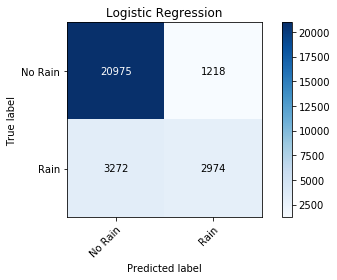

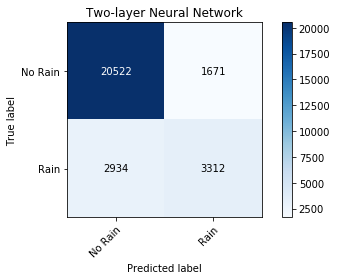

In [423]:
#Confusion Matrix
class_names = np.array(['No Rain','Rain'])
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true,y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
   # else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plot_confusion_matrix(y_test, y_pred_lr, classes=class_names,
                      title='Logistic Regression')
plot_confusion_matrix(y_test, y_pred_nn, classes=class_names,
                      title='Two-layer Neural Network')